# **Data Science & Business Analytics**
#### ***The sparks foundation***


### **TASK - 1 Prediction using Supervised ML** 
#### ***By - Kamad Saxena***

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Importing packages
To import necessary libraries for this task, execute the following import statements:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# %matplotlib inline

#### Collecting the data 

In [ ]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script

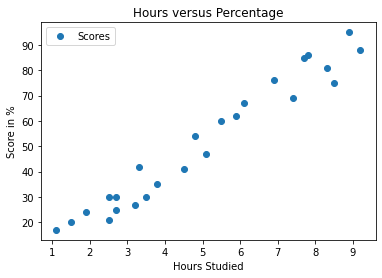

In [ ]:
data.plot(x = "Hours", y = "Scores", style="o")
plt.title("Hours versus Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Score in %")
plt.show()

### **Preparing the Data**

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels". We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column. To extract the attributes and labels, execute the following script:

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

The above script splits 75% of the data to training set while 25% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

### **Training The algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm by executing the following commands:

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

1.9322042531516601
[9.94167834]


This means that for every one unit of change in hours studied, the change in the score is about 9.94% (Coefficient of X)

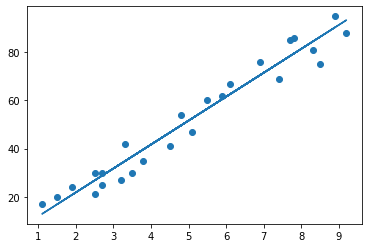

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make pre-dictions on the test data, execute the following script:

In [ ]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.insert(0, "Hours",   x_test)
df


,Hours,Actual,Predicted
0,1.5,20,16.844722
1,3.2,27,33.745575
2,7.4,69,75.500624
3,2.5,30,26.786400
4,5.9,62,60.588106
5,3.8,35,39.710582
6,1.9,24,20.821393


### **Comparing the Result**
Now, its time to compare the results predicted by our algorithm with the actual results. We are using a matplotlib graph to compare both of these values.

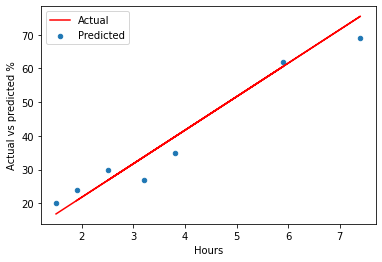

In [ ]:
ax = plt.gca()
df.plot(kind='scatter',x='Hours',y='Actual',ax=ax)
df.plot(kind='line',x='Hours',y='Predicted', color='red', ax=ax)
plt.xlabel("Hours")
plt.ylabel("Actual vs predicted %")
plt.legend(["Actual", "Predicted"])
plt.show()

### **Testing It for Custom Input**

In [ ]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652


#### **Evaluating the Algorithm**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. The Scikit-Learn library comes with pre-built functions that can be used to find out the mean absolute error value for us.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.130879918502482
